# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [107]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [108]:
iris = datasets.load_iris()
print(iris['feature_names'])
print(iris.DESCR)   #資料說明文件


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:M

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [109]:
print(iris.keys())   ## 先瞭解資料中有那些索引鍵（不是欄位哦）
print(iris['filename'])
print(iris.data[0:10])
print(type(iris.data))
print(iris.target_names)
print(iris.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [110]:
X = iris.data[:,0:2]
#print(X)
print(X.shape)
Y = iris.target
#print(Y)
print(Y.shape)

(150, 2)
(150,)


In [114]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [115]:
print('target_names:'+str(iris['target_names']))

target_names:['setosa' 'versicolor' 'virginica']


In [116]:
#建立Target欄位與資料
y = pd.DataFrame(iris.target,columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [117]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x,y],axis=1)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [118]:
#選擇目標為 sepal length (cm),petal length (cm),target的資料
#只選擇上述資料之欄位為0與1的資料
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
print(iris_data,'\n')
iris_data = iris_data[iris_data['target'].isin([0,1])]   #取出target那行裡面0與1的部分
print(iris_data)
print(iris['data'].size)

     sepal length (cm)  petal length (cm)  target
0                  5.1                1.4       0
1                  4.9                1.4       0
2                  4.7                1.3       0
3                  4.6                1.5       0
4                  5.0                1.4       0
..                 ...                ...     ...
145                6.7                5.2       2
146                6.3                5.0       2
147                6.5                5.2       2
148                6.2                5.4       2
149                5.9                5.1       2

[150 rows x 3 columns] 

    sepal length (cm)  petal length (cm)  target
0                 5.1                1.4       0
1                 4.9                1.4       0
2                 4.7                1.3       0
3                 4.6                1.5       0
4                 5.0                1.4       0
..                ...                ...     ...
95                5.7          

## 切分訓練集與測試集
> train_test_split()

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris_data[['sepal length (cm)','petal length (cm)']],iris_data[['target']],test_size=0.3,random_state=20)

In [120]:
print(X_train.head())
X_train.shape

    sepal length (cm)  petal length (cm)
39                5.1                1.5
64                5.6                3.6
72                6.3                4.9
60                5.0                3.5
46                5.1                1.6


(70, 2)

In [121]:
print(X_test.head())
X_test.shape

    sepal length (cm)  petal length (cm)
70                5.9                4.8
74                6.4                4.3
2                 4.7                1.3
44                5.1                1.9
56                6.3                4.7


(30, 2)

In [122]:
print(Y_train.head())
Y_train.shape

    target
39       0
64       1
72       1
60       1
46       0


(70, 1)

In [123]:
print(Y_test.head())
Y_test.shape

    target
70       1
74       1
2        0
44       0
56       1


(30, 1)

# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值平方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [124]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs,axis=0)
    sigma = np.std(dfs,axis=0)
    return (minimum, maximum, mu, sigma)

def z_score(col, stats):   #z-score standardization. 計算時呼叫def norm_stats
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df


In [125]:
stats = norm_stats(X_train)
z_score_X_train = np.array(z_score(X_train, stats))
z_score_arr_Y_train = np.array(Y_train)
print('z_score_X_train=','\n',z_score_X_train[:5],'\n')

stats = norm_stats(X_test)
z_score_X_test = np.array(z_score(X_test, stats))
print('z_score_X_test=','\n',z_score_X_test[:5])

z_score_X_train= 
 [[-0.54393947 -0.96900665]
 [ 0.24930559  0.50556869]
 [ 1.35984867  1.41840103]
 [-0.70258848  0.43535081]
 [-0.54393947 -0.89878877]] 

z_score_X_test= 
 [[ 0.55689855  1.33755155]
 [ 1.32327271  1.00035368]
 [-1.28239942 -1.02283354]
 [-0.6693001  -0.61819609]
 [ 1.16999788  1.27011197]]


## use sklearn

In [126]:
from sklearn.preprocessing import StandardScaler
#用於標準化數據,使每一個特徵的均值為0,標準差為1. 就是使數據分佈變成標準正態分佈
sc = StandardScaler().fit(X_train)  #計算輸入數據每行的均值與標準差
print('X_train的mean=',sc.mean_,'\n')  #mean
print('X_train的標準差=',sc.scale_,'\n') #standard deviation
sc1 = StandardScaler().fit(X_test)
print('X_test的mean=',sc1.mean_,'\n')  #mean
print('X_test的標準差=',sc1.scale_) #standard deviation

X_train的mean= [5.44285714 2.88      ] 

X_train的標準差= [0.63032224 1.42413884] 

X_test的mean= [5.53666667 2.81666667] 

X_test的標準差= [0.65242283 1.4828089 ]


In [127]:
#transform: (x-u)/std.
z_score_X_train = sc.transform(X_train)   #X_train依據fit函數所得到的均值與標準差, 再計算其z-score standardization
z_score_X_train[:5]

array([[-0.54393947, -0.96900665],
       [ 0.24930559,  0.50556869],
       [ 1.35984867,  1.41840103],
       [-0.70258848,  0.43535081],
       [-0.54393947, -0.89878877]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [128]:
z_score_X_test = sc1.transform(X_test)   #X_test依據fit函數所得到的均值與標準差, 再計算其z-score standardization
print(z_score_X_test[:5])

[[ 0.55689855  1.33755155]
 [ 1.32327271  1.00035368]
 [-1.28239942 -1.02283354]
 [-0.6693001  -0.61819609]
 [ 1.16999788  1.27011197]]


you can also use fit_transform method (i.e., fit and then transform)    

In [129]:
z_score_X_train = StandardScaler().fit_transform(X_train)
print(z_score_X_train[:5],'\n')
z_score_X_test = StandardScaler().fit_transform(X_test)
print(z_score_X_test[:5])


[[-0.54393947 -0.96900665]
 [ 0.24930559  0.50556869]
 [ 1.35984867  1.41840103]
 [-0.70258848  0.43535081]
 [-0.54393947 -0.89878877]] 

[[ 0.55689855  1.33755155]
 [ 1.32327271  1.00035368]
 [-1.28239942 -1.02283354]
 [-0.6693001  -0.61819609]
 [ 1.16999788  1.27011197]]


In [130]:
print('mean of z_score_X_train:',np.round(z_score_X_train.mean(),4))
print('std of z_score_X_train:',z_score_X_train.std())
print('mean of z_score_X_test:',np.round(z_score_X_test.mean(),4))
print('std of z_score_X_test:',z_score_X_test.std())

mean of z_score_X_train: -0.0
std of z_score_X_train: 1.0
mean of z_score_X_test: 0.0
std of z_score_X_test: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


x1y1平均= 48.92347435892929 

x2y2平均= 31.449334292470233


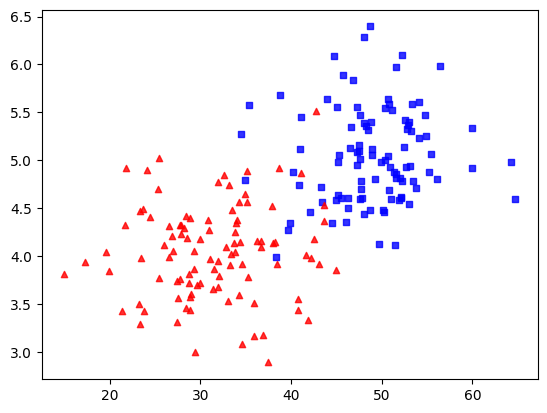

In [131]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print('x1y1平均=',np.sum(x1)/len(x1),'\n')
print('x2y2平均=',np.sum(x2)/len(x2))

In [132]:
x_val = np.concatenate((x1,x2))    #x1與x2的列對接
y_val = np.concatenate((y1,y2))
print(x_val[0:10],'\n')
print('shape=',x_val.shape)
print('max=',x_val.max())
print('min=',x_val.min())

[43.38616119 53.22530218 44.5129569  56.14523865 34.49741451 43.32157815
 47.59873405 52.12994663 50.11007754 50.83774828] 

shape= (200,)
max= 64.72973654978742
min= 14.970593968507957


In [133]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [134]:
minmax_norm(x_val)[0:10]

array([0.57106224, 0.76879758, 0.59370723, 0.82747898, 0.39242679,
       0.56976432, 0.65572151, 0.74678442, 0.7061915 , 0.72081536])

In [135]:
from sklearn.preprocessing import MinMaxScaler
x_val=x_val.reshape(-1, 1)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print('max=',scaler.data_max_, '\n')
print(scaler.transform(x_val)[:10])   #帶入值求正規化

max= [64.72973655] 

[[0.57106224]
 [0.76879758]
 [0.59370723]
 [0.82747898]
 [0.39242679]
 [0.56976432]
 [0.65572151]
 [0.74678442]
 [0.7061915 ]
 [0.72081536]]
